In [ ]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install bokeh
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib

In [13]:
import pandas as pd
import matplotlib as plt

df = pd.read_csv('backtracking_benchmark.csv')
df

,Name,Input,Iterations per Second,Standard Deviation Iterations Per Second,Run Time Average,Run Time Median,Run Time Minimum,Run Time Maximum,Run Time Standard Deviation,Run Time Standard Deviation Ratio,Run Time Sample Size,Memory Usage Average,Memory Usage Median,Memory Usage Minimum,Memory Usage Maximum,Memory Usage Standard Deviation,Memory Usage Standard Deviation Ratio,Memory Usage Sample Size
0,backtracking_default,10 Queens optimal,49.567276,2.114247,2.017460e+07,2.004550e+07,1.896100e+07,2.565000e+07,8.605292e+05,0.042654,248,9.791944e+06,9.791944e+06,9791944,9791944,0.0,0.0,238
1,backtracking_minimum_remaining_values,10 Queens optimal,49.275894,1.573939,2.029390e+07,2.025200e+07,1.901000e+07,2.391000e+07,6.482149e+05,0.031941,247,9.875040e+06,9.875040e+06,9875040,9875040,0.0,0.0,233
2,backtracking_default,10 Queens slower,0.521186,0.004449,1.918702e+09,1.909768e+09,1.908731e+09,1.937607e+09,1.638042e+07,0.008537,3,7.307667e+08,7.307667e+08,730766688,730766688,0.0,0.0,3
3,backtracking_minimum_remaining_values,10 Queens slower,0.028346,0.000000,3.527894e+10,3.527894e+10,3.527894e+10,3.527894e+10,0.000000e+00,0.000000,1,1.314175e+10,1.314175e+10,13141751072,13141751072,0.0,0.0,1
4,backtracking_default,15 Queens optimal,1.139949,0.038924,8.772323e+08,8.766640e+08,8.392320e+08,9.208000e+08,2.995325e+07,0.034145,6,4.171074e+08,4.171074e+08,417107408,417107408,0.0,0.0,6
5,backtracking_minimum_remaining_values,15 Queens optimal,1.137472,0.037341,8.791425e+08,8.793970e+08,8.395610e+08,9.163070e+08,2.886032e+07,0.032828,6,4.185255e+08,4.185255e+08,418525456,418525456,0.0,0.0,6
6,backtracking_default,4 Queens optimal,9029.415328,1129.571473,1.107491e+05,1.050000e+05,1.010000e+05,7.060000e+05,1.385461e+04,0.125099,44870,6.345600e+04,6.345600e+04,63456,63456,0.0,0.0,23655
7,backtracking_minimum_remaining_values,4 Queens optimal,8594.638613,1070.109479,1.163516e+05,1.100000e+05,1.050000e+05,7.530000e+05,1.448682e+04,0.124509,42670,6.772800e+04,6.772800e+04,67728,67728,0.0,0.0,22807
8,backtracking_default,4 Queens slower,339.239284,15.719155,2.947772e+06,2.915000e+06,2.780000e+06,5.000000e+06,1.365894e+05,0.046336,1696,9.830720e+05,9.830720e+05,983072,983072,0.0,0.0,1600
9,backtracking_minimum_remaining_values,4 Queens slower,315.540037,14.057497,3.169170e+06,3.160000e+06,2.897000e+06,5.027000e+06,1.411884e+05,0.044551,1577,1.039856e+06,1.039856e+06,1039856,1039856,0.0,0.0,1539


In [154]:
df_optimal_by_size = df \
    .loc[(df['Name'] == 'backtracking_default') & (df['Input'].str.contains('optimal')), ['Input', 'Run Time Median']] \
    .sort_values(by='Run Time Median') \
    .copy() \
    .replace(to_replace='(\d+) Queens optimal', value='\\1', regex=True)

df_optimal_by_size['Input'] = df_optimal_by_size['Input'].apply(lambda x: int(x))
df_optimal_by_size['Run Time Median'] = df_optimal_by_size['Run Time Median'].apply(lambda x: x / 1_000_000.0)

df_optimal_by_size

,Input,Run Time Median
6,4,0.1050
10,8,12.3965
0,10,20.0455
4,15,876.6640


In [152]:
df_slower_by_size = df \
    .loc[(df['Name'] == 'backtracking_default') & (df['Input'].str.contains('slower')), ['Input', 'Run Time Median']] \
    .sort_values(by='Run Time Median') \
    .copy() \
    .replace(to_replace='(\d+) Queens slower', value='\\1', regex=True)

df_slower_by_size['Input'] = df_slower_by_size['Input'].apply(lambda x: int(x))
df_slower_by_size['Run Time Median'] = df_slower_by_size['Run Time Median'].apply(lambda x: x / 1_000_000.0)

df_slower_by_size

,Input,Run Time Median
8,4,2.915
12,8,987.693
2,10,1909.768


In [153]:
df_optimal_vs_slower_by_size = df_optimal_by_size.set_index('Input').join(df_slower_by_size.set_index('Input'), how='left', rsuffix=' (slower)')

df_optimal_vs_slower_by_size

,Run Time Median,Run Time Median (slower)
Input,,
4,105000.0,2.915
8,12396500.0,987.693
10,20045500.0,1909.768
15,876664000.0,NaN


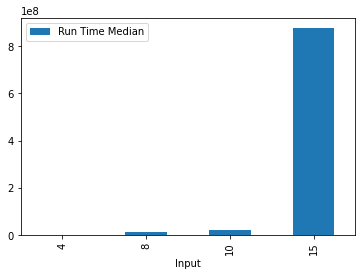

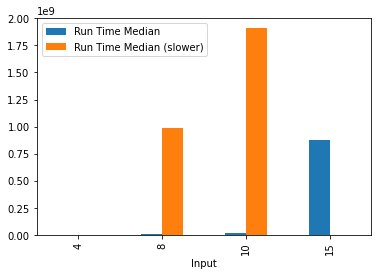

In [151]:

df_optimal_by_size.plot.bar(x='Input')
df_optimal_vs_slower_by_size.plot.bar()